In [3]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd

In [24]:
def power_spec(data):
    fourier = ugradio.dft.dft(data, vsamp = 31.25e6)
    power = np.abs(fourier[1])**2
    return fourier[0], power

# 7.1 DSB Mixer

In [25]:
df_dsb = pd.read_csv('data/dsb_data')
dsb_plus = df_dsb['Plus']
dsb_minus = df_dsb['Minus']

In [26]:
dsb_power_plus = power_spec(dsb_plus)

<IPython.core.display.Javascript object>


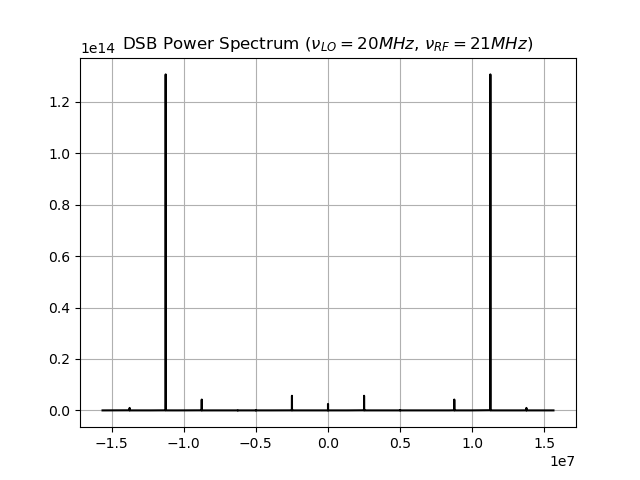

In [35]:
plt.figure()
plt.grid()
plt.plot(dsb_power_plus[0], dsb_power_plus[1], color='k')
plt.title(r'DSB Power Spectrum ($\nu_{LO} = 20 MHz$, $\nu_{RF} = 21 MHz$)')
plt.show()

In [28]:
dsb_power_minus = power_spec(dsb_minus)

<IPython.core.display.Javascript object>


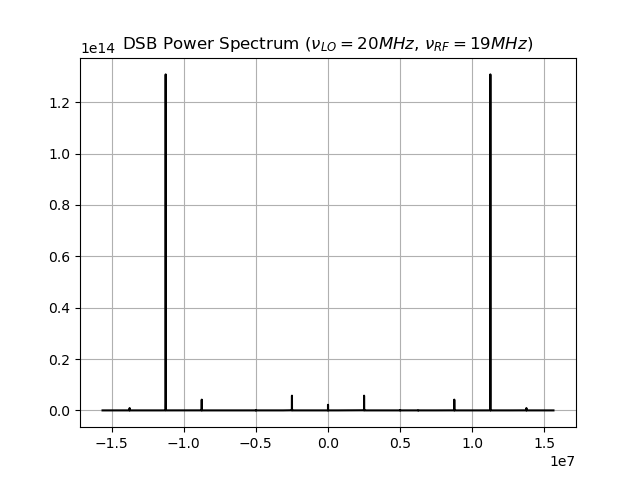

In [34]:
plt.figure()
plt.grid()
plt.plot(dsb_power_minus[0], dsb_power_minus[1], color='k')
plt.title(r'DSB Power Spectrum ($\nu_{LO} = 20 MHz$, $\nu_{RF} = 19 MHz$)')
plt.show()

<IPython.core.display.Javascript object>


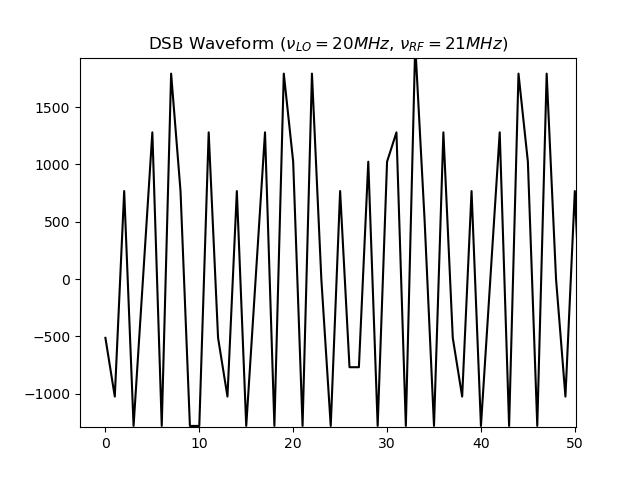

In [39]:
plt.figure()
plt.plot(dsb_plus, color = 'k')
plt.title(r'DSB Waveform ($\nu_{LO} = 20 MHz$, $\nu_{RF} = 21 MHz$)')
plt.show()

In [40]:
dsb_volt_plus = ugradio.dft.dft(dsb_plus, vsamp = 31.25e6)

<IPython.core.display.Javascript object>


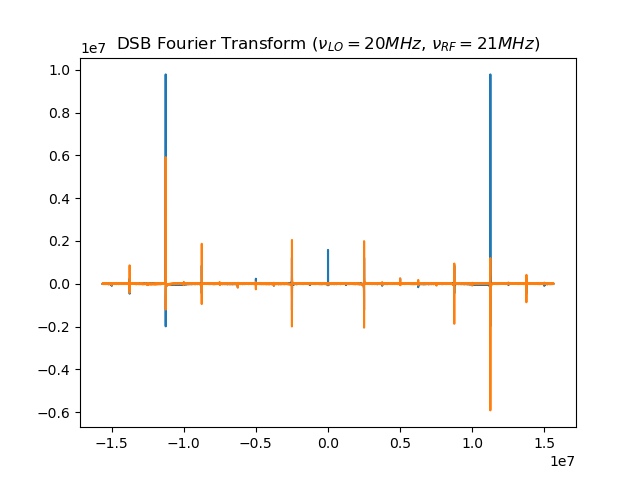

In [41]:
plt.figure()
plt.plot(dsb_volt_plus[0], dsb_volt_plus[1].real)
plt.plot(dsb_volt_plus[0], dsb_volt_plus[1].imag)
plt.title(r'DSB Fourier Transform ($\nu_{LO} = 20 MHz$, $\nu_{RF} = 21 MHz$)')
plt.show()

# 7.2: Intermodulation Products

<IPython.core.display.Javascript object>


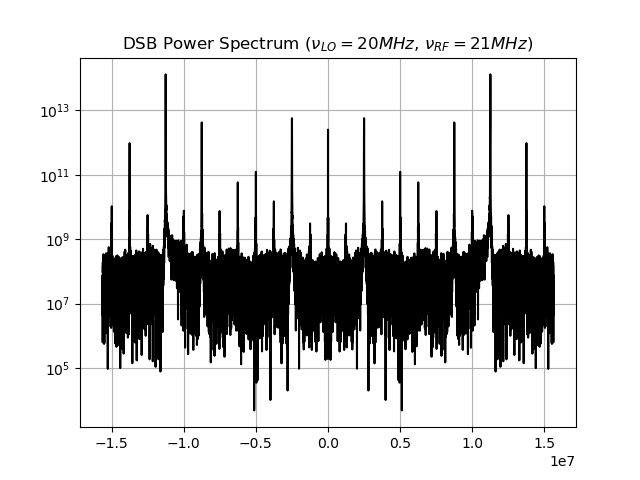

In [43]:
plt.figure()
plt.grid()
plt.semilogy(dsb_power_plus[0], dsb_power_plus[1], color='k')
plt.title(r'DSB Power Spectrum ($\nu_{LO} = 20 MHz$, $\nu_{RF} = 21 MHz$)')
plt.show()

# 7.3: SSB Mixer

In [85]:
def csv2numpy(fname):
    csv_data_plus, csv_data_minus = pd.read_csv('data/'+fname)['Plus'], pd.read_csv('data/'+fname)['Minus']
    N_samples = len(csv_data_plus)
    np_data = np.empty((N_samples,2), dtype='complex')
    for i in range(N_samples):
        if not csv_data_plus[i][0] == '(':
            np_data[i, 0] = complex(csv_data_plus[i])
        else:
            np_data[i,0] = complex(csv_data_plus[i][1:-1])
        if not csv_data_minus[i][0] == '(':
            np_data[i, 1] = complex(csv_data_plus[i])
        else:
            np_data[i,1] = complex(csv_data_minus[i][1:-1])
    return np_data

In [87]:
ssb_0 = csv2numpy('ssb_0_data.csv')
ssb_0_plus = ssb_0[:, 0]
ssb_0_minus = ssb_0[:, 1]

In [89]:
ssb_0_power_plus = power_spec(ssb_0_plus)
ssb_0_power_minus = power_spec(ssb_0_minus)

<IPython.core.display.Javascript object>


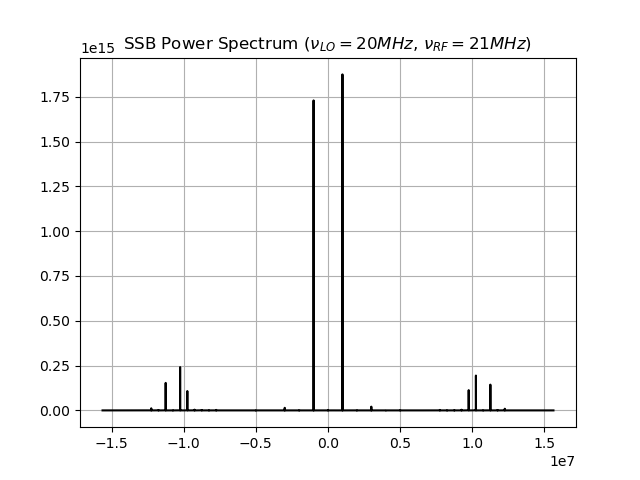

In [90]:
plt.figure()
plt.grid()
plt.plot(ssb_0_power_plus[0], ssb_0_power_plus[1], color='k')
plt.title(r'SSB Power Spectrum ($\nu_{LO} = 20 MHz$, $\nu_{RF} = 21 MHz$)')
plt.show()

<IPython.core.display.Javascript object>


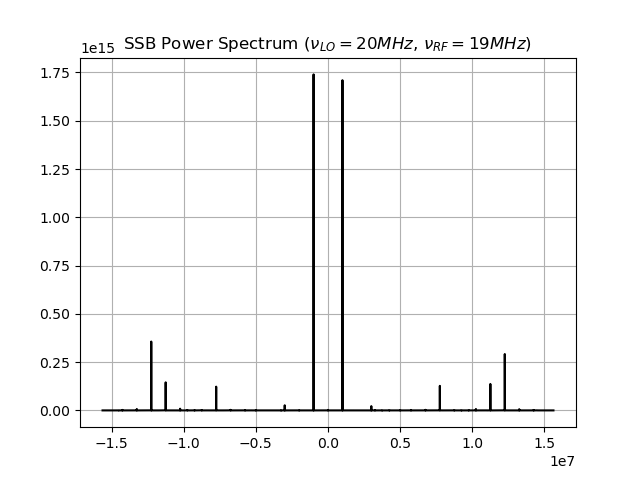

In [91]:
plt.figure()
plt.grid()
plt.plot(ssb_0_power_minus[0], ssb_0_power_minus[1], color='k')
plt.title(r'SSB Power Spectrum ($\nu_{LO} = 20 MHz$, $\nu_{RF} = 19 MHz$)')
plt.show()

In [92]:
ssb_90 = csv2numpy('ssb_90_data.csv')
ssb_90_plus = ssb_90[:, 0]
ssb_90_minus = ssb_90[:, 1]

In [93]:
ssb_90_power_plus = power_spec(ssb_90_plus)
ssb_90_power_minus = power_spec(ssb_90_minus)

<IPython.core.display.Javascript object>


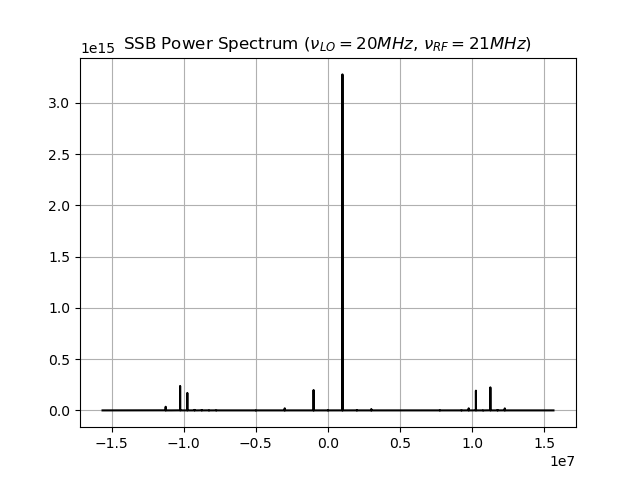

In [98]:
plt.figure()
plt.grid()
plt.plot(ssb_90_power_plus[0], ssb_90_power_plus[1], color='k')
plt.title(r'SSB Power Spectrum ($\nu_{LO} = 20 MHz$, $\nu_{RF} = 21 MHz$)')
plt.show()

<IPython.core.display.Javascript object>


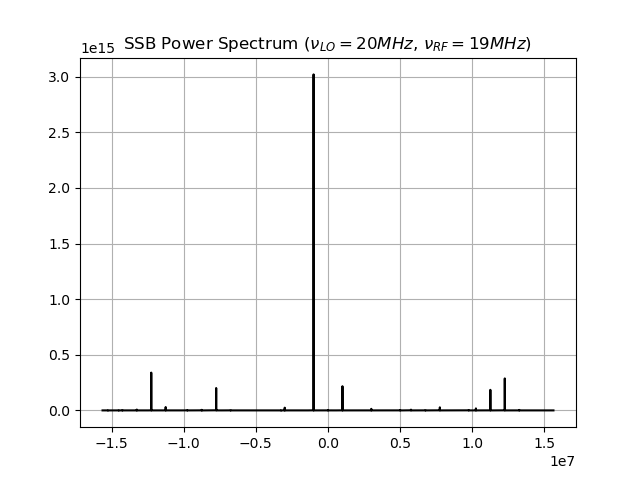

In [96]:
plt.figure()
plt.grid()
plt.plot(ssb_90_power_minus[0], ssb_90_power_minus[1], color='k')
plt.title(r'SSB Power Spectrum ($\nu_{LO} = 20 MHz$, $\nu_{RF} = 19 MHz$)')
plt.show()